 Código para resolver um problema simples de transmissão de calor, unidimensional, pelo método dos elementos fintos (problema do livro do Fish & Belytschko). Importamos as bibliotecas de algebra matricial e de gráficos


 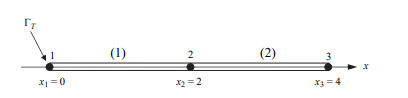



In [2]:
import numpy as np
import matplotlib.pyplot as plt


Parâmetros do cálculo: comprimento total da barra,
área da seção transversal, constante elástica, comprimento dos elementos, módulo de Young. A dimensão do problema é igual ao número de nós. Exemplo 2 elementos lineares, 3 nós. 4 elementos lineares, 5 nós

In [98]:
#Quantidade de nós. deve ser modificado pelo usuário
nos=3
#Vamos plotar dois cálculos para comparação
nos2=10
#Comprimento total da barra
comp=4
#Seção transversal
A=0.1
#Condutividade térmica
k=2
#Temperatura fixa no primeiro nó (extremo esquerdo engastado)
T0=0
#Fluxo de calor no último nó (extremo direito)
q=5
#Fonte interna de calor
s=5


#A partir daqui, nada deve ser modidificado.Estrutura 1D - elementos = nos -1
elem=nos-1
elem2=nos2-1
#Tamanho dos elementos
l=comp/(elem)
l2=comp/elem2
#Condutividade térmica dos elementos
k1=A*k/l
k2=A*k/l2
print(nos,elem,l,k1)
print(nos2,elem2,l2,k2)

3 2 2.0 0.1
10 9 0.4444444444444444 0.45000000000000007


Se quiséssemos escrever a matriz manualmente, no caso de dim=3, seria assim

In [ ]:
#K=np.array([[0.1,-0.1,0], [-0.1,0.2,-0.1], [0.0,-0.1,0.1]])
#print(K)

Automatizando Matriz Rigidez. Método direto

In [99]:
K1=np.identity(nos,float)

for i in range(nos) :
  for j in range (nos) :
    if (i==j and (i==0 or i==(nos-1))) :
      K1[i,j]=k1
    elif abs(i-j)==1 :
      K1[i,j]=-k1
    elif (i==j and (i!=0 or i!=(nos-1)) ) :
      K1[i,j]=2*k1

print(K1)


[[ 0.1 -0.1  0. ]
 [-0.1  0.2 -0.1]
 [ 0.  -0.1  0.1]]


Agora para a segunda análise com número maior de nós nos2


In [100]:
K2=np.identity(nos2,float)

for i in range(nos2) :
  for j in range (nos2) :
    if (i==j and (i==0 or i==(nos2-1))) :
      K2[i,j]=k2
    elif abs(i-j)==1 :
      K2[i,j]=-k2
    elif (i==j and (i!=0 or i!=(nos-1)) ) :
      K2[i,j]=2*k2

print(K2)

[[ 0.45 -0.45  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.45  0.9  -0.45  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.45  0.9  -0.45  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.45  0.9  -0.45  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.45  0.9  -0.45  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.45  0.9  -0.45  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.45  0.9  -0.45  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.45  0.9  -0.45  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.45  0.9  -0.45]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -0.45  0.45]]


O determinante nulo indica que as condições de contorno do problema não foram definidas

In [101]:
#det=np.linalg.det(K1)
#print(det)
#u,v=np.linalg.eig(K1)
#print("Autovalores",u),
#print("Autovetores",v)

Se invertermmos a matriz singular, teremos uma mensagem de erro

In [102]:
#M=np.linalg.inv(K1)
#print(M)

Impondo BC. No caso, apenas o nó 1 está engastado.  Cortamos a linha 1 e a coluna 1 da matriz K1, pois o primeiro nó está fixo (engastado). Note que agora o determinante da submatriz livre não é mais nulo e ela é invesível




In [103]:
S=np.identity(nos-1,float)
for i in range(nos-1) :
  for j in range(nos-1) :
    S[i,j]=K1[i+1,j+1]

print(S)
#det2=np.linalg.det(S)
#print(det2)

[[ 0.2 -0.1]
 [-0.1  0.1]]


Para o segundo conjunto de nós

In [104]:
S2=np.identity(nos2-1,float)
for i in range(nos2-1) :
  for j in range(nos2-1) :
    S2[i,j]=K2[i+1,j+1]

print(S2)

[[ 0.9  -0.45  0.    0.    0.    0.    0.    0.    0.  ]
 [-0.45  0.9  -0.45  0.    0.    0.    0.    0.    0.  ]
 [ 0.   -0.45  0.9  -0.45  0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.45  0.9  -0.45  0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.45  0.9  -0.45  0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.45  0.9  -0.45  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.45  0.9  -0.45  0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.45  0.9  -0.45]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.45  0.45]]


In [105]:
INV=np.linalg.inv(S)
print(INV)
#print(np.linalg.det(INV))

[[10. 10.]
 [10. 20.]]


In [106]:
INV2=np.linalg.inv(S2)
print(INV2)

[[ 2.22222222  2.22222222  2.22222222  2.22222222  2.22222222  2.22222222
   2.22222222  2.22222222  2.22222222]
 [ 2.22222222  4.44444444  4.44444444  4.44444444  4.44444444  4.44444444
   4.44444444  4.44444444  4.44444444]
 [ 2.22222222  4.44444444  6.66666667  6.66666667  6.66666667  6.66666667
   6.66666667  6.66666667  6.66666667]
 [ 2.22222222  4.44444444  6.66666667  8.88888889  8.88888889  8.88888889
   8.88888889  8.88888889  8.88888889]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 11.11111111
  11.11111111 11.11111111 11.11111111]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  13.33333333 13.33333333 13.33333333]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  15.55555556 15.55555556 15.55555556]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  15.55555556 17.77777778 17.77777778]
 [ 2.22222222  4.44444444  6.66666667  8.88888889 11.11111111 13.33333333
  15.55555556 17.77777

Apenas para verificação. O produto de uma matriz pela sua inversa deve dar a matriz identidade (números em potências 1o^(-16 são numericamente zero)

In [107]:
#I=INV@S
#print(I)

Source é a matriz coluna dos termos de fonte interna de calor, no exemplo s=5 W/m mas pode ser mudado acima. A matriz de força de corpo para cada elemento será dada pelo produto do interpolador de lagrange por esta matriz



In [108]:
#Source=np.array([s,s])
#Fce=l/6*np.array([[2,1],[1,2]])@Source.T
#print(Fce)

Escrevemos as Matrizes de força de corpo, de superfície e total usando matrizes expandidas ao invés de matrizes de junção

In [109]:
Fc=np.zeros(nos)
for i in range(nos):
    if i==0 or i==nos-1 :
      Fc[i]=l*s/2
      #print("Ciclo", i)
    else :
      Fc[i]=l*s

Fs=np.zeros(nos)
if  i==nos-1 :
  Fs[i]=-0.5
else :
  Fs[i]=0

F=Fc+Fs
print(Fc,Fs,F)

[ 5. 10.  5.] [ 0.   0.  -0.5] [ 5.  10.   4.5]


Para o problema com nos2

In [110]:
Fc2=np.zeros(nos2)
for i in range(nos2):
    if i==0 or i==nos2-1 :
      Fc2[i]=l2*s/2
      #print("Ciclo", i)
    else :
      Fc2[i]=l2*s

Fs2=np.zeros(nos2)
if  i==nos2-1 :
  Fs2[i]=-0.5
else :
  Fs2[i]=0

F2=Fc2+Fs2
print(Fc2,Fs2,F2)

[1.11111111 2.22222222 2.22222222 2.22222222 2.22222222 2.22222222
 2.22222222 2.22222222 2.22222222 1.11111111] [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5] [1.11111111 2.22222222 2.22222222 2.22222222 2.22222222 2.22222222
 2.22222222 2.22222222 2.22222222 0.61111111]


Cortamos os termos associados aos nós engastados (no caso, apenas o primeiro)

In [111]:
FL=np.ones(nos-1)
#array1d=np.ones(3)
#print(array1d)

for i in range(nos-1) :
  FL[i]=F[i+1]

print(FL)

FL2=np.ones(nos2-1)
for i in range(nos2-1) :
  FL2[i]=F2[i+1]

print(FL2)

[10.   4.5]
[2.22222222 2.22222222 2.22222222 2.22222222 2.22222222 2.22222222
 2.22222222 2.22222222 0.61111111]


Multiplicando a inversa da submatriz de rigidez livre, com a matriz de força livre, obtemos os valores da temperatura nos 4 nós livres. A temperatura no nó engastado é dada: zero grau Celsius.

In [112]:
T=INV@FL
#print("Temperaturas com",nos,"nós:", T)

T2=INV2@FL2
#print("Temperaturas com",nos2,"nós:", T2)

Para fazer o gráfico, determinamos os pontos das coordenadas dos nós. No caso de dim=5 são 0, 1, 2, 3, e 4  

In [113]:
x1=np.linspace(0,comp,nos)
print(x1)

x2=np.linspace(0,comp,nos2)
print(x2)

[0. 2. 4.]
[0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.        ]


Agora escrevemos a matriz de valores de temperatura, juntando os resultados calculados com o valor prescrito do nó engastado, x=0, T1=0

In [141]:
Tc=np.ones(nos)

for i in range(nos) :
  if i==0 :
     Tc[i]=0.0
  else  :
     Tc[i]=T[i-1]

print("Temperaturas com",nos,"nós:", Tc)

Tc2=np.ones(nos2)

for i in range(nos2) :
  if i==0 :
     Tc2[i]=0.0
  else  :
     Tc2[i]=T2[i-1]

print("Temperaturas com",nos2,"nós:", Tc2)


Temperaturas com 3 nós: [  0. 145. 190.]
Temperaturas com 10 nós: [  0.          40.86419753  76.79012346 107.77777778 133.82716049
 154.9382716  171.11111111 182.34567901 188.64197531 190.        ]


Fazemos o gráfico, sobrepondo a solução exata do problema (quadrática) com os resultados que obtivemos

Nós 1= 3 Nós 2= 10


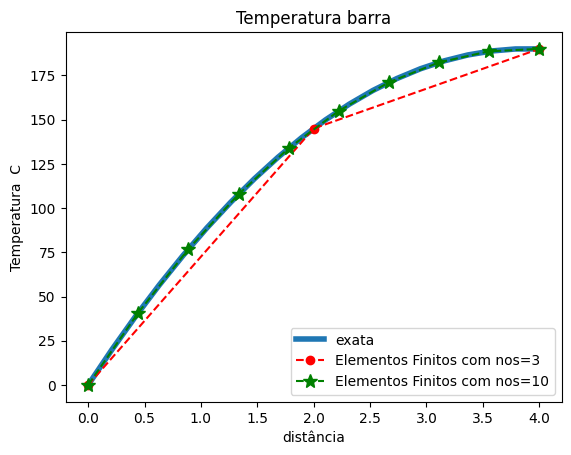

In [153]:
x=np.linspace(0,comp,20)
Tex=-12.5*x**2+97.5*x
print ("Nós 1=",nos,"Nós 2=",nos2)

plt.plot(x,Tex,lw=4,label="exata"),
plt.plot(x1,Tc,"o--",color="red",label='Elementos Finitos com nos={}' .format(nos))
#plt.plot(x, y, label='y = %.2f x' %A)
plt.plot(x2,Tc2,"*--",color="green",ms=10,label="Elementos Finitos com nos={}".format(nos2))
plt.xlabel("distância")
plt.ylabel("Temperatura  C")
plt.title("Temperatura barra")
plt.legend(loc='lower right', fontsize=10, ncol=1)
plt.show()